# Part A: Data Preprocessing

## 1. Identify and handle missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\nafna\\Downloads\\customer_raw_data_1500.csv") #read the data
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST1000,68,Unknown,new york,"$93,792",2022-02-16,79.0
1,CUST1001,43,MALE,Los Angeles,"$138,681",23/09/2022,74.0
2,CUST1002,73,MALE,Huston,"$30,858",30/07/2022,32.0
3,CUST1003,25,FEMALE,new york,"$138,103",2022-05-02,36.0
4,CUST1004,72,FeMale,Unknown,"$103,229",2022-08-30,83.0


In [3]:
data.info() # data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     1500 non-null   object 
 1   Age             1500 non-null   int64  
 2   Gender          1500 non-null   object 
 3   City            1500 non-null   object 
 4   Income          1370 non-null   object 
 5   Customer_Since  1500 non-null   object 
 6   Spending_Score  1482 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 82.2+ KB


In [4]:
data.dtypes # display the data types

Customer_ID        object
Age                 int64
Gender             object
City               object
Income             object
Customer_Since     object
Spending_Score    float64
dtype: object

In [5]:
data.isna().sum() # identify missing values

Customer_ID         0
Age                 0
Gender              0
City                0
Income            130
Customer_Since      0
Spending_Score     18
dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data['Income'] = data['Income'].replace({r'\$': '', ',': ''}, regex=True)
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

In [8]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [9]:
data['Spending_Score'].fillna(data['Spending_Score'].mean(),inplace=True) #filling missing data of numerical column with median

In [10]:
data['Income']=data['Income'].fillna(data['Income'].mode()[0])  #filling missing data of categorical column with mode

In [11]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST1000,68,Unknown,new york,93792.0,2022-02-16,79.0
1,CUST1001,43,MALE,Los Angeles,138681.0,23/09/2022,74.0
2,CUST1002,73,MALE,Huston,30858.0,30/07/2022,32.0
3,CUST1003,25,FEMALE,new york,138103.0,2022-05-02,36.0
4,CUST1004,72,FeMale,Unknown,103229.0,2022-08-30,83.0


In [12]:
data.isna().sum()

Customer_ID       0
Age               0
Gender            0
City              0
Income            0
Customer_Since    0
Spending_Score    0
dtype: int64

Imputation ensures that we don't lose valuable data when only a few entries are missing.
Removing rows might be appropriate if the number of missing values is too large and imputation could lead to incorrect conclusions.

## 2. Fix inconsistent data formats 

In [13]:
# Remove $ and commas, and convert to float
data['Income'] = data['Income'].astype(str)
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

In [14]:
# Convert dates to YYYY-MM-DD format
data['Customer_Since'] = pd.to_datetime(data['Customer_Since'], errors='coerce')

In [15]:
# Standardize gender
data['Gender'] = data['Gender'].str.title()
# Standardize city names
data['City'] = data['City'].str.title()

In [16]:
print(data.dtypes)

Customer_ID               object
Age                        int64
Gender                    object
City                      object
Income                   float64
Customer_Since    datetime64[ns]
Spending_Score           float64
dtype: object


## 3. Handle categorical data 

In [17]:
# Standardize Gender
gender_map = {
    'male': 'Male',
    'female': 'Female',
    'm': 'Male',
    'f': 'Female',
    'male': 'Male',
    'MALE': 'Male'
}
data['Gender'] = data['Gender'].str.lower().map(gender_map).fillna('Unknown')

# Standardize City
city_map = {
    'ny': 'New York',
    'new york': 'New York',
    'la': 'Los Angeles'
}
data['City'] = data['City'].str.title().replace(city_map)

# Convert city names to standardized versions
data['City'] = (data['City'].str.lower()  # Convert all to lowercase first
    .map(city_map)  # Apply standardization mapping
    .fillna(data['City'].str.title()) ) # Title-case any unmapped values
    
# remove invalid values
data = data[(data['Age'] > 0) & (data['Age'] < 120)]

## 4. Remove duplicates and obvious data errors 

In [18]:
duplicated = data.duplicated()
duplicated.sum()

np.int64(0)

In [19]:
data = data[~duplicated]
data = data[data['Income']>0]

In [20]:
num_df=data.select_dtypes(include="number")
cat_df=data.select_dtypes(include="object_")

In [21]:
print("Numerical columns are: ")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are: ")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are: 
['Age', 'Income', 'Spending_Score']
Categorical columns are: 
['Customer_ID', 'Gender', 'City']


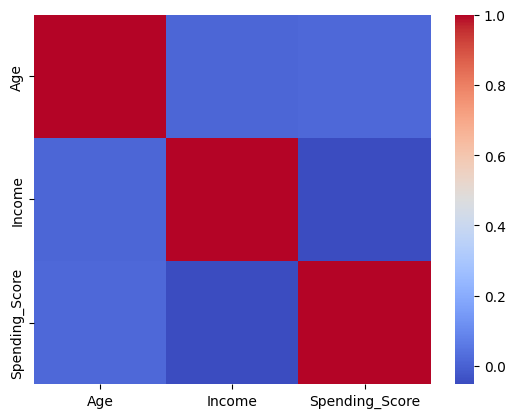

In [22]:
sns.heatmap(num_df.corr(),annot=False,cmap="coolwarm")
plt.show()

### List how many duplicates or errors you found and how you fixed them. 
### There are no duplicate rows and columns in the data

# Part B: Exploratory Data Analysis  

## 1. Summarize the dataset 

### Mean, median, and mode of age and income. 

In [23]:
mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode()[0]

print("Mean of Age: ",mean_age)
print("Median of Age: ",median_age)
print("Mode of Age: ",mode_age)

Mean of Age:  52.80096418732782
Median of Age:  53.0
Mode of Age:  25


In [24]:
mean_income = data['Income'].mean()
median_income = data['Income'].median()
mode_income = data['Income'].mode()[0]


print("Mean of Income: ",mean_income)
print("Median of Income: ",median_income)
print("Mode of Income: ",mode_income)

Mean of Income:  85116.79500311677
Median of Income:  85126.78394160584
Mode of Income:  85126.78394160584


### Distribution of customers across cities and genders.

In [25]:
data['City'].value_counts()

City
Los Angeles    434
New York       417
Huston         210
Houston        199
Unknown        192
Name: count, dtype: int64

In [26]:
data['Gender'].value_counts()

Gender
Female     601
Unknown    431
Male       420
Name: count, dtype: int64

## 2. Insights generation 

##### Pattern: 1 (Age Group and Spending):

<Axes: xlabel='Age_Group'>

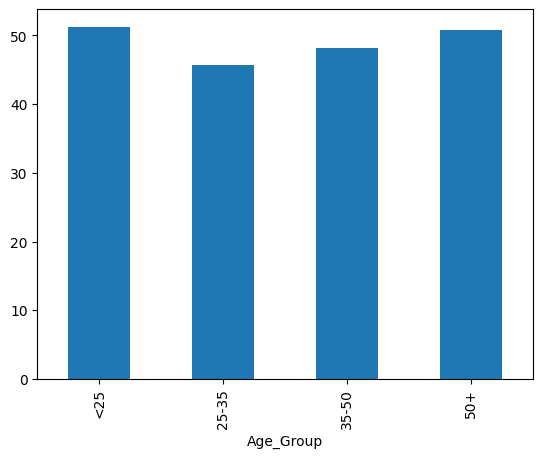

In [27]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])
data.groupby('Age_Group')['Spending_Score'].mean().plot(kind='bar')

##### Pattern: 2 (Gender and Spending):

In [28]:
spending_by_gender = data.groupby('Gender')['Spending_Score'].mean()
print(spending_by_gender)

Gender
Female     49.274123
Male       50.627081
Unknown    49.207001
Name: Spending_Score, dtype: float64


<Axes: xlabel='Gender'>

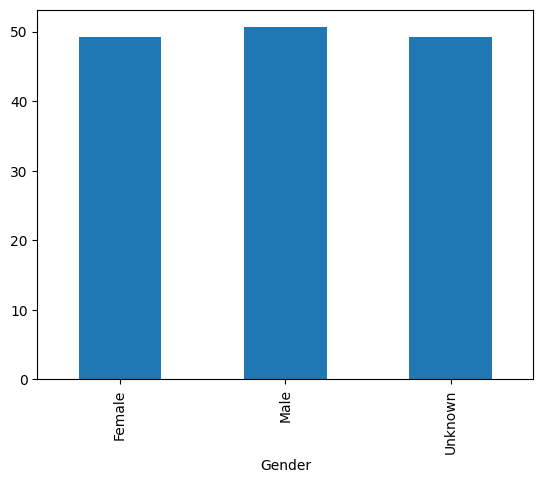

In [29]:
data.groupby('Gender')['Spending_Score'].mean().plot(kind='bar')

## 3. Data issues you noticed 

###  Are there any red flags or things that don’t make sense even after cleaning? 
##### Any negative income/spending scores.
##### Very recent Customer_Since dates with high spending.
##### Gender marked as Other but only in 1 or 2 instances.

## Saving Cleaned Data as Csv

In [30]:
cleaned_data = ('Pre processing and EDA.csv')
data.to_csv(cleaned_data , index=False)